## Домашнее задание к лекции "Визуализация данных"

Вам необходимо провести базовый EDA (https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

In [1]:
import os
import datetime

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

C:\Users\aamos\Documents\Education\Netology\Python\_Visualiz\retail_data_set

- Features data set.csv
- sales data-set.csv
- stores data-set.csv

C:\Users\aamos\OneDrive\Netology\Python\_Обмен\_Visualiz\retail_data_set

D:\Documents_AL\Netology\Python\_Visualiz\retail_data_set

In [4]:
df_retail_feat = pd.read_csv('C:\\Users\\aamos\\Documents\\Education\\Netology\\Python\\_Visualiz\\retail_data_set\\Features data set.csv')
df_retail_sales_1 = pd.read_csv('C:\\Users\\aamos\\Documents\\Education\\Netology\\Python\\_Visualiz\\retail_data_set\\sales data-set.csv')
df_retail_store = pd.read_csv('C:\\Users\\aamos\\Documents\\Education\\Netology\\Python\\_Visualiz\\retail_data_set\\stores data-set.csv')

In [5]:
df_retail_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [6]:
df_retail_sales_1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [7]:
df_retail_sales_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [28]:
df_retail_sales = df_retail_sales_1.groupby(['Store', 'Date', 'IsHoliday']).sum()
df_retail_sales.reset_index(['Store','Date', 'IsHoliday'], inplace=True)
df_retail_sales = df_retail_sales[['Store','Date', 'Weekly_Sales','IsHoliday']]
df_retail_sales.head()

,Store,Date,Weekly_Sales,IsHoliday
0,1,01/04/2011,1495064.75,False
1,1,01/06/2012,1624477.58,False
2,1,01/07/2011,1488538.09,False
3,1,01/10/2010,1453329.50,False
4,1,02/03/2012,1688420.76,False


In [9]:
df_retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   IsHoliday     6435 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 157.2+ KB


In [10]:
def change_date_format(date):
    date_format_dt = pd.to_datetime(date, format='%d/%m/%Y')
    return date_format_dt

In [11]:
df_retail_sales['D_Datetime'] = df_retail_sales['Date'].apply(change_date_format)

In [12]:
df_retail_sales_for_dynamics = df_retail_sales.merge(df_retail_store, on='Store', how='left')
df_retail_sales_for_dynamics.head()

,Store,Date,Weekly_Sales,IsHoliday,D_Datetime,Type,Size
0,1,01/04/2011,1495064.75,False,2011-04-01,A,151315
1,1,01/06/2012,1624477.58,False,2012-06-01,A,151315
2,1,01/07/2011,1488538.09,False,2011-07-01,A,151315
3,1,01/10/2010,1453329.50,False,2010-10-01,A,151315
4,1,02/03/2012,1688420.76,False,2012-03-02,A,151315


In [17]:
df_dynamics_by_year = df_retail_sales_for_dynamics[['Type', 'D_Datetime', 'Weekly_Sales']].groupby(['Type','D_Datetime']).sum()


In [14]:
table_type = pd.pivot_table(df_dynamics_by_year, values='Weekly_Sales', index=['D_Datetime'], columns=['Type'], aggfunc=np.sum)


In [15]:
table_type['Sales'] = table_type['A'] + table_type['B'] + table_type['C']
table_type['Year'] = table_type.index.year
table_type['Month'] = table_type.index.month

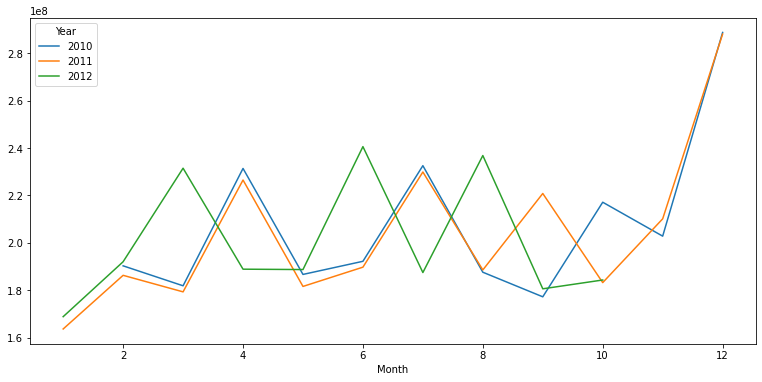

In [16]:
table_type_All = table_type[['Sales','Month', 'Year']]
table_type_All = pd.pivot_table(table_type_All, values='Sales', index=['Month'], columns=['Year'], aggfunc=np.sum)
table_type_All.plot()

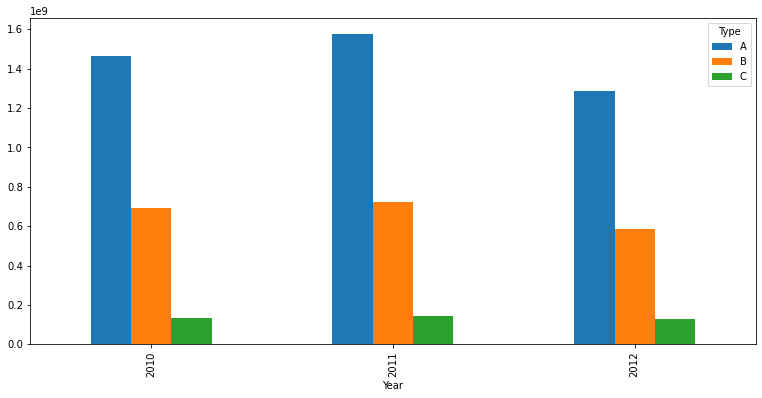

In [18]:
table_type_All_category = table_type[['A','B','C','Year']]
table_type_All_category = table_type_All_category.groupby('Year').sum()
table_type_All_category.plot(kind='bar')


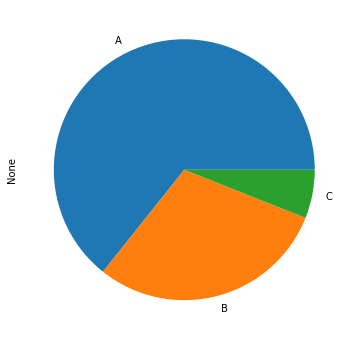

In [19]:
t_2 = table_type[['A','B','C']]
t_2.sum().plot.pie()

In [ ]:
import seaborn as sns

In [27]:
df_sales_factor = df_retail_sales_for_dynamics
df_sales_factor['Sales_per_size'] = df_sales_factor['Weekly_Sales'] / df_sales_factor['Size'] 
df_sales_factor = df_sales_factor.merge(df_retail_feat, on=['Store', 'Date'], how='left')


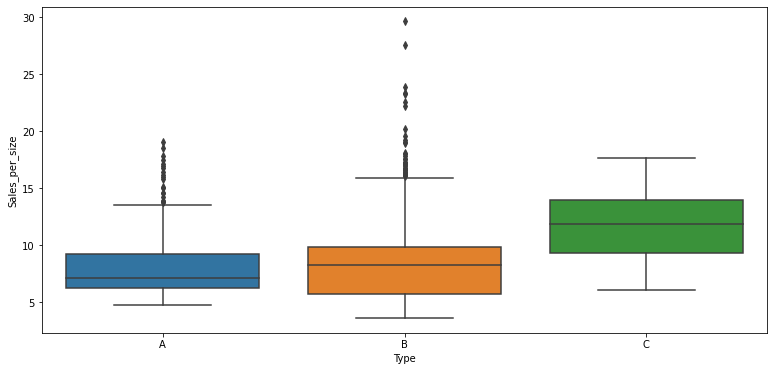

In [25]:
sns.boxplot(x="Type", y="Sales_per_size", 
            data=df_sales_factor)

Text(0.5, 1.0, 'Sales_per_size')

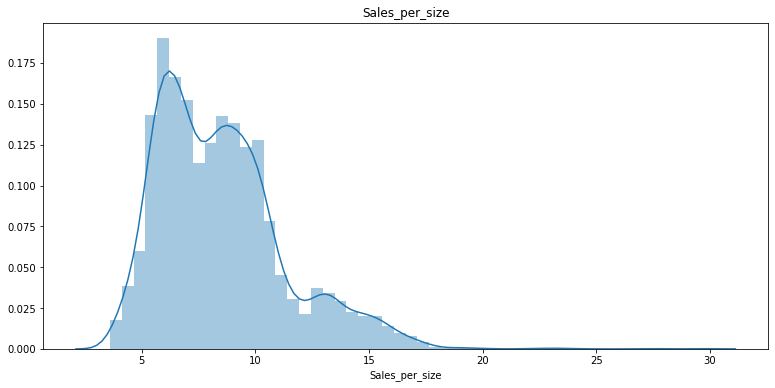

In [26]:
df_sales_factor
ax = sns.distplot(df_sales_factor.Sales_per_size)
ax.set_title('Sales_per_size')

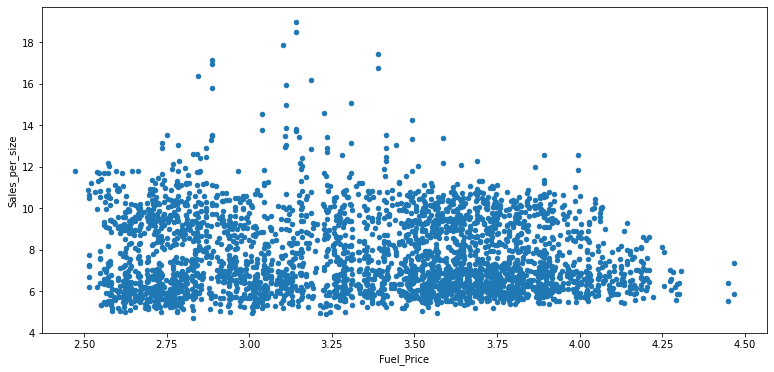

In [33]:
df_sales_factor_FP = df_sales_factor[['Store','Date','Weekly_Sales','Type','Sales_per_size','Fuel_Price']]
df_sales_factor_FP.dropna()
type_filter = ['A']
df_sales_factor_FP = df_sales_factor_FP.query(f'Type == {type_filter}')
df_sales_factor_FP.plot.scatter(x='Fuel_Price',y='Sales_per_size')

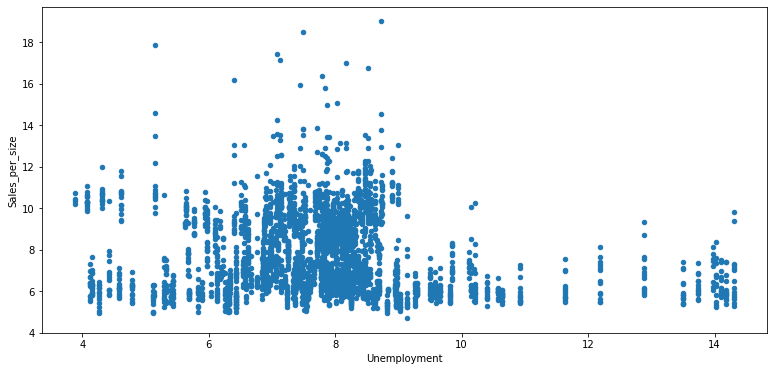

In [37]:
df_sales_factor_jl = df_sales_factor[['Store','Date','Weekly_Sales','Type','Sales_per_size','Unemployment']]
df_sales_factor_jl.dropna()
type_filter = ['A']
df_sales_factor_jl = df_sales_factor_jl.query(f'Type == {type_filter}')
df_sales_factor_jl.plot.scatter(x='Unemployment',y='Sales_per_size')

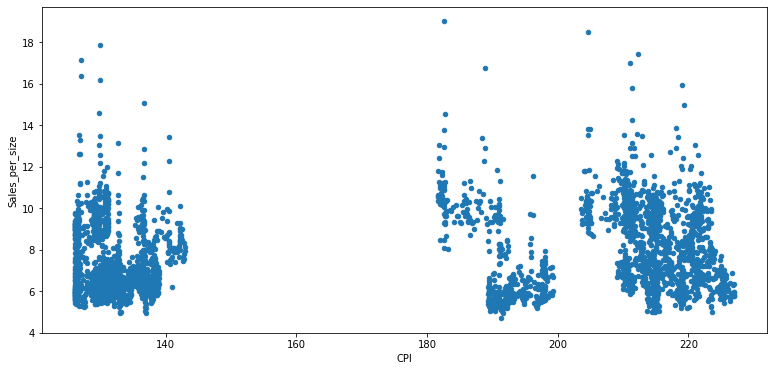

In [40]:
df_sales_factor_CPI = df_sales_factor[['Store','Date','Weekly_Sales','Type','Sales_per_size','CPI']]
df_sales_factor_CPI.dropna()
type_filter = ['A']
df_sales_factor_CPI = df_sales_factor_CPI.query(f'Type == {type_filter}')
df_sales_factor_CPI.plot.scatter(x='CPI',y='Sales_per_size')

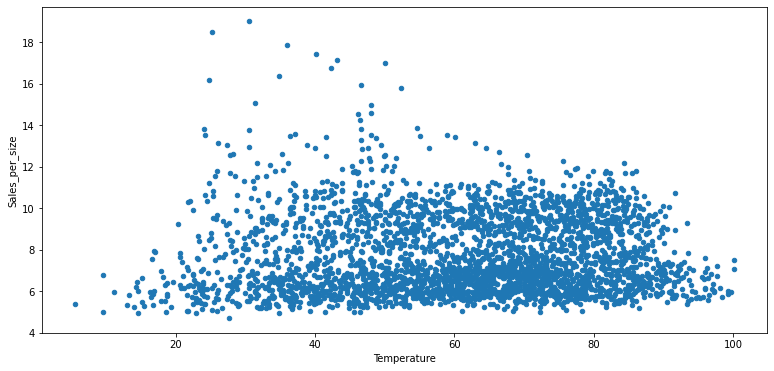

In [41]:
df_sales_factor_temp = df_sales_factor[['Store','Date','Weekly_Sales','Type','Sales_per_size','Temperature']]
df_sales_factor_temp.dropna()
type_filter = ['A']
df_sales_factor_temp = df_sales_factor_temp.query(f'Type == {type_filter}')
df_sales_factor_temp.plot.scatter(x='Temperature',y='Sales_per_size')

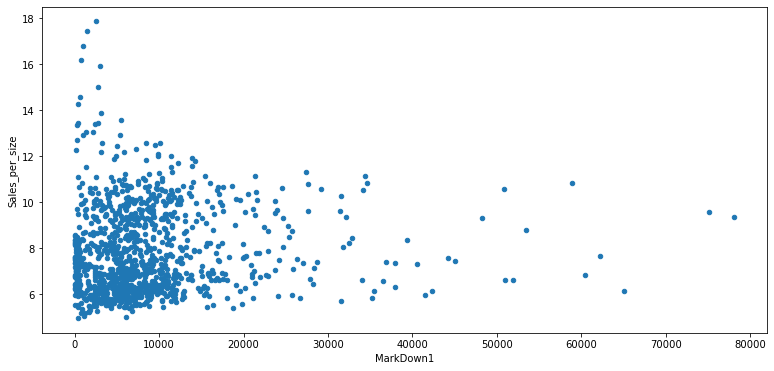

In [37]:
df_sales_factor_MD1 = df_sales_factor[['Store','Date','Weekly_Sales','Type','Sales_per_size','MarkDown1']]
df_sales_factor_MD1.fillna(0)
type_filter = ['A']
df_sales_factor_MD1 = df_sales_factor_MD1.query(f'Type == {type_filter}')
df_sales_factor_MD1.plot.scatter(x='MarkDown1',y='Sales_per_size')

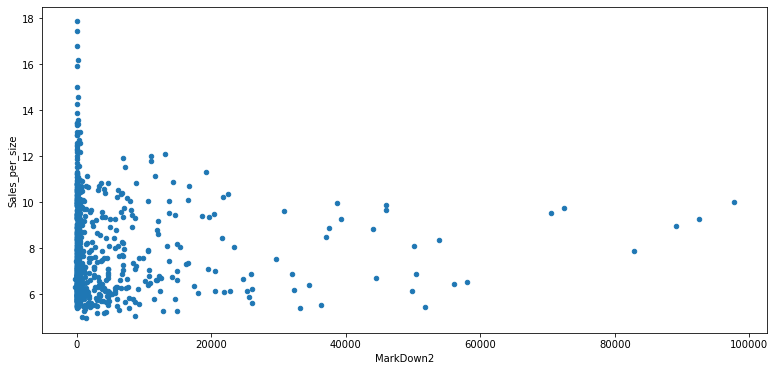

In [40]:
df_sales_factor_MD2 = df_sales_factor[['Store','Date','Weekly_Sales','Type','Sales_per_size','MarkDown2']]
df_sales_factor_MD2.fillna(0)
type_filter = ['A']
df_sales_factor_MD2 = df_sales_factor_MD2.query(f'Type == {type_filter}')
df_sales_factor_MD2.plot.scatter(x='MarkDown2',y='Sales_per_size')

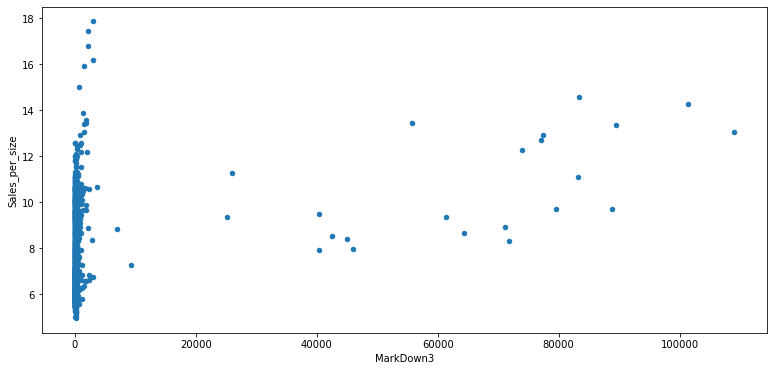

In [41]:
df_sales_factor_MD3 = df_sales_factor[['Store','Date','Weekly_Sales','Type','Sales_per_size','MarkDown3']]
df_sales_factor_MD3.fillna(0)
type_filter = ['A']
df_sales_factor_MD3 = df_sales_factor_MD3.query(f'Type == {type_filter}')
df_sales_factor_MD3.plot.scatter(x='MarkDown3',y='Sales_per_size')

### Дополнительная часть (необязательная)
- построить дополнительно не менее 2 визуализаций (итого не менее 6);
- в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;